In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from numpy.linalg import norm

plt.style.use('seaborn-v0_8')

# 1. 1D: golden-section search

$$ f(x) = 2x + \frac{1}{x}, \, x \in [0; \, 1], \, \varepsilon = 0.1, $$

find minimum function value and its argument $x^*, f(x^*)?$

In [2]:
def golden_section(eps=0.1, a=0, b=1, f=lambda x: 2 * x + 1 / x) -> tuple[float, int, list[float]]:
    phi = (1 + np.sqrt(5)) / 2

    iter_count, steps = 0, []
    while abs(b - a) >= eps:
        x1, x2 = b - (b - a) / phi, a + (b - a) / phi

        if f(x1) >= f(x2):
            a = x1
            steps.append(a)
        else:
            b = x2
            steps.append(b)

        iter_count += 1
    
    return (a + b) / 2, iter_count, steps


f = lambda x: 2 * x + 1 / x

# calculating
m, iters, steps = golden_section(eps=0.1)
print(f"Minimum point:\t{m}\nNumber of iterations:\t{iters}")

Minimum point:	0.7188470506254733
Number of iterations:	5


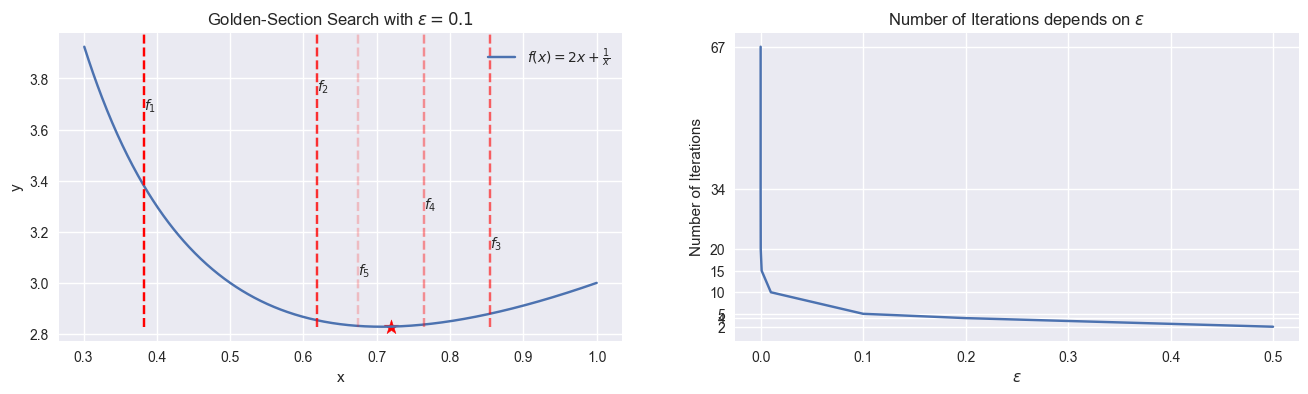

In [3]:
###################### plotting ######################

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
h = 0.001

# built on f(min), f(max) values
y = [f(m) - h, max(f(0 + h), f(1)) + h]

# add step to 0 because doesn't exist in zero
x = np.arange(0.3 + h, 1 + h, h)

ax[0].scatter(m, f(m), marker="*", c="r", s=120)
ax[0].plot(x, f(x), label="$f(x) = 2x + \\frac{1}{x}$")

ax[0].axis('tight')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Golden-Section Search with $\\varepsilon = 0.1$")
ax[0].legend()

# vertical line designating steps
for i, l in enumerate(steps):
    ax[0].plot([l, l], y, 'r--', alpha=(len(steps) - i) / len(steps))
    
    ax[0].annotate(f"$f_{{{i + 1}}}$", (l, np.random.uniform(2.8, 3.8)))


############ plotting iterations ############

iters = [[eps, golden_section(eps=eps)[1]] for eps in [0.5, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.0000001, 10e-15]]

ax[1].plot([e[0] for e in iters], [i[1] for i in iters])
ax[1].set_yticks([i[1] for i in iters])
ax[1].set_xlabel("$\\varepsilon$")
ax[1].set_ylabel("Number of Iterations")
ax[1].set_title("Number of Iterations depends on $\\epsilon$");

---

# 2. ND: Method of Steepest Descent

$$ 1. \quad f(x, y) = (x - y^2)^2 + y^4 $$

$$ 2. \quad f(x, y) = 20(y - x^2)^2 + (1 - x)^2 $$

find minimum function value and its argument $(x^*, y^*), f(x^*, y^*)?$


In [4]:
def grad(x: np.array, f, h=10e-4) -> float:
    g = np.zeros(len(x))
    xd = x.copy()

    for i, _ in enumerate(x):
        xd[i] = x[i] + h
        g[i] = (f(xd) - f(x)) / h
        xd = x.copy()
    return g


def _coef(x: np.array, f) -> float:
    a = 1
    b = 0.9

    while f(x - a * grad(x, f)) > f(x - a * b * grad(x, f)):
        a *= b
    return a


def steepest_descent(f, x: np.array, eps=10e-6, norm=None) -> tuple[np.array, int, np.array]:

    iter_counts, steps = 0, x.copy()[np.newaxis, :]
    prev = -10e12
    while abs(f(x) - prev) >= eps: 
        prev = f(x)    
        x -= _coef(x, f) * grad(x, f) 
        steps = np.append(steps, x[np.newaxis, :], axis=0)
        iter_counts += 1

    return x, iter_counts, steps


f = lambda x: (x[0] - x[1]**2)**2 + x[1]**4
g = lambda x: 20 * (x[1] - x[0]**2)**2 + (1 - x[0])**2


m1, iters1, steps1 = steepest_descent(f, np.array([0.01, 0.01]))
m2, iters2, steps2 = steepest_descent(g, np.array([0., 0.]))


print(f"Minimum and number of iterations for 1st function:\t{list(m1)} {iters1}")
print(f"Minimum and number of iterations for 2nd function:\t{list(m2)} {iters2}")

Minimum and number of iterations for 1st function:	[5.142448000000795e-05, 0.010196445146174198] 2
Minimum and number of iterations for 2nd function:	[0.9266705112357609, 0.8573491662044768] 87


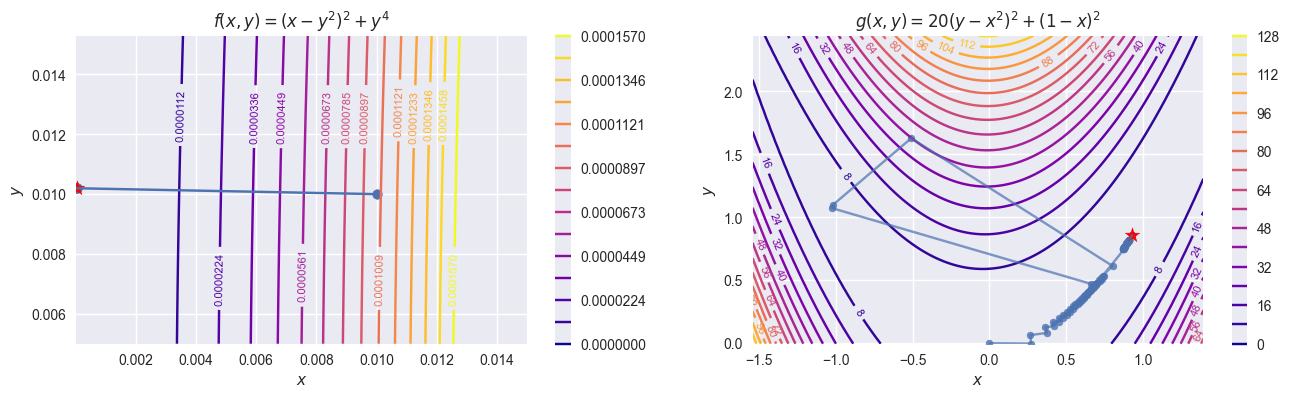

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

####################### f = (x[0] - x[1]**2)**2 + x[1]**4 #######################

n = 100
x0, x1, y0, y1 = np.min(steps1[:, 0]), np.max(steps1[:, 0]), np.min(steps1[:, 1]), np.max(steps1[:, 1])
x, y = np.linspace(x0 - abs(x0 / 2), x1 + abs(x1 / 2), n), np.linspace(y0 - abs(y0 / 2), y1 + abs(y1 / 2), n)

X, Y = np.meshgrid(x, y)
Z = (X - Y**2)**2 + Y**4

cntr = ax[0].contour(X, Y, Z, cmap="plasma", levels=np.linspace(0, np.max(Z) * 0.7, 15))
plt.colorbar(cntr)
ax[0].clabel(cntr, cntr.levels, fontsize=8)

ax[0].plot(steps1[:, 0], steps1[:, 1])
ax[0].scatter(steps1[:, 0], steps1[:, 1])
ax[0].scatter(m1[0], m1[1], marker="*", c="r", s=120)

ax[0].set_title("$f(x, y) = (x - y^2)^2 + y^4$")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")


####################### g = 20 * (x[1] - x[0]**2)**2 + (1 - x[0])**2 #######################

n = 100
x0, x1, y0, y1 = np.min(steps2[:, 0]), np.max(steps2[:, 0]), np.min(steps2[:, 1]), np.max(steps2[:, 1])
x, y = np.linspace(x0 - abs(x0 / 2), x1 + abs(x1 / 2), n), np.linspace(y0 - abs(y0 / 2), y1 + abs(y1 / 2), n)

X, Y = np.meshgrid(x, y)
Z = 20 * (Y - X**2)**2 + (1 - X)**2

cntr = ax[1].contour(X, Y, Z, cmap="plasma", levels=15)
plt.colorbar(cntr)
ax[1].clabel(cntr, cntr.levels, fontsize=8)

ax[1].plot(steps2[:, 0], steps2[:, 1], alpha=0.7)
ax[1].scatter(steps2[:, 0], steps2[:, 1], alpha=0.8, s=25)
ax[1].scatter(m2[0], m2[1], marker="*", c="r", s=120)

ax[1].set_title("$g(x, y) = 20(y - x^2)^2 + (1 - x)^2$")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$");

---

<br>

Дано $N$ точек на плоскости. На заданной прямой на плоскости найти точку $(x,y)$, сумма расстояний от которой до заданных точек минимальна. Подсказка (проверить, что минимизируемая функция выпукла и, следовательно, унимодальная). 

<br>

$x \in \mathbb{R}^n, \, x_i \in [x0, \, x1], \text{тогда}$

$$ f(x) = \langle a, x \rangle + b. $$

<br>

Решим задачу в $\mathbb{R}^2$

0.6744952161865934 -0.4480238325754061


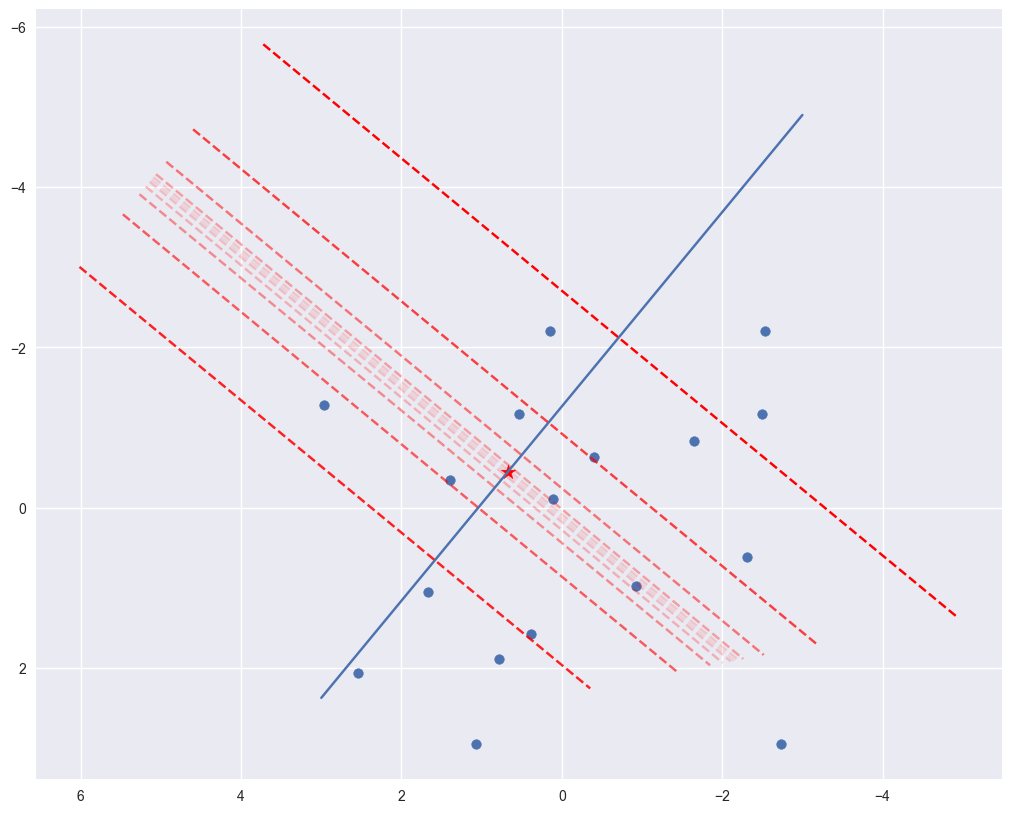

In [56]:
def distance(x: np.array, p: list) -> float:
    return np.sqrt( (x[:, 0] - p[0])**2 + (x[:, 1] - p[1])**2 ).sum()

######################## inition data ########################

#n = 15
#x0, x1 = -1, 1
#y0, y1 = -1, 1

#c, d = -1, 0.2
n = np.random.randint(10, 25)

x0, x1 = np.random.randint(-5, 5, 2)
#y0, y1 = np.random.randint(-5, 5, 2)
y0, y1 = x0, x1

c, d = np.random.uniform(-2, 2), np.random.uniform(-2, 2)

recta = lambda x: c * x + d

points = np.append(
    np.random.uniform(x0, x1, n)[:, np.newaxis], 
    np.random.uniform(y0, y1, n)[:, np.newaxis], 
    axis=1
)


######################## golden-ration search ########################

phi = (1 + np.sqrt(5)) / 2

a, b = x0, x1
eps = 10e-3

steps = [] # counting of iterations doesn't make sense, 'cause points are choosen randomly 
while norm(a - b) > eps: # norm from linalg - euclidian
    t1, t2 = b - (b - a) / phi, a + (b - a) / phi

    if distance(points, [t1, recta(t1)]) >= distance(points, [t2, recta(t2)]):
        a = t1
        steps.append(a)
    else:
        b = t2
        steps.append(b)
    
print((a + b) / 2, recta((a + b) / 2))


######################## plotting ########################

fig, ax = plt.subplots(figsize=(16, 10))

x = np.linspace(x0, x1, 100)
ax.plot(x, recta(x))
ax.scatter(points[:, 0], points[:, 1])
ax.scatter((a + b) / 2, recta((a + b) / 2), marker="*", c="r", s=120)

perp_recta = lambda x, x0, y0: -(x - x0) / c + y0

for i, s in enumerate(steps):
    rects_x = np.linspace(perp_recta(y1, recta(s), max(x0, s)), perp_recta(y0, recta(s), s), 2)
    ax.plot(rects_x, perp_recta(rects_x, s, recta(s)), 'r--', alpha=((len(steps) - i) / len(steps))**2)


plt.xlim(x0, x1)
plt.ylim(y0, y1)
ax.axis("scaled");